# PISA Data Findings
## by Josip Matic

## Investigation Overview

> My goal is to show the impact of students skipping school and the direct visual correlation to bad grades.

## Dataset Overview

> PISA is a worldwide study developed by the Organisation for Economic Co-operation and Development (OECD) to examine the skills of 15-year-old school students around the world. The study assesses students’ maths, science, and reading skills and contains a wealth of information on students’ background, their school and the organisation of the education system. For most countries, the sample is around 5,000 students, but in some countries the number is even higher.

> The dataset to be used is from the PISA study in 2012.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.available
style.use('ggplot')
import seaborn as sb
%matplotlib inline

# Import dataset
pisa = pd.read_csv(r'C:\Users\Josip\Documents\_Udacity\ND_DA\5_Assessment\pisa2012.csv', encoding = "ISO-8859-1", low_memory=False)
pisa_dict = pd.read_csv(r'C:\Users\Josip\Documents\_Udacity\ND_DA\5_Assessment\pisadict2012.csv', encoding = "ISO-8859-1", names=['ColName','Definition'])

In [2]:
# Import dataset
pisa = pd.read_csv(r'C:\Users\Josip\Documents\_Udacity\ND_DA\5_Assessment\pisa2012.csv', encoding = "ISO-8859-1", low_memory=False)
pisa_dict = pd.read_csv(r'C:\Users\Josip\Documents\_Udacity\ND_DA\5_Assessment\pisadict2012.csv', encoding = "ISO-8859-1", names=['ColName','Definition']);

In [3]:
# Copies of original datasets are asigned to new dataframes
pisa_clean = pisa.copy()
pisa_dict_clean = pisa_dict.copy()

# Columns with relevance in this project
col_names = ['CNT','STIDSTD','AGE','ST04Q01','ST08Q01'
            ,'ST11Q01','ST11Q02','ST26Q02','ST26Q04','ST26Q06'
            ,'PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH'
            ,'PV1READ','PV2READ','PV3READ','PV4READ','PV5READ'
            ,'PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']
pisa_clean = pisa_clean[col_names]


# Mean of math calculated
pisa_clean['MATH'] = pisa_clean[['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH']].mean(axis=1)
# Mean of reading calculated
pisa_clean['READ'] = pisa_clean[['PV1READ','PV2READ','PV3READ','PV4READ','PV5READ']].mean(axis=1)
# Mean of science calculated
pisa_clean['SCIENCE'] = pisa_clean[['PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']].mean(axis=1)

# drop columns
pisa_clean.drop(['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH',
                 'PV1READ','PV2READ','PV3READ','PV4READ','PV5READ',
                 'PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE'], 1, inplace=True)

# renaming the columns
pisa_clean.columns = ['COUNTRY','STUDENT_ID','AGE','GENDER','SKIPPED_SCHOOL'
                     ,'AT_HOME_MOTHER','AT_HOME_FATHER','POS_OWN_ROOM'
                     ,'POS_OWN_COMP','POS_INTERNET','MATH','READ','SCIENCE']

# Calc average of all scores
pisa_clean['AVG_SCORE'] = pisa_clean[['MATH','READ','SCIENCE']].mean(axis=1)

# remove blank spaces
pisa_clean.SKIPPED_SCHOOL = pisa_clean.SKIPPED_SCHOOL.str[:-2]

# Fill NaN in column AGE with average of all ages
pisa_clean['AGE'] = pisa_clean['AGE'].fillna(pisa_clean['AGE'].mean())
# Replacing all "empty" strings with 'Unknown'
pisa_clean = pisa_clean.replace(np.nan, 'Unknown', regex=True);

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

# Possessions
## Univariate Exploration
> Among others, it was investigated if the students possessed their own room or not and afterwards investigated if it had an effect on their scoring

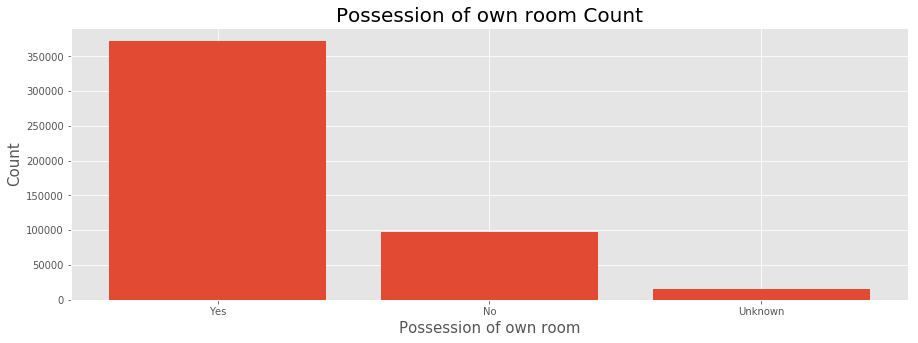

In [4]:
# Count of POS_OWN_ROOM
posOwnRoom_agg = pisa_clean['POS_OWN_ROOM'].value_counts().reset_index(name='COUNT').rename(columns={'index': 'POS_OWN_ROOM'})

# Plot histogram
plt.figure(figsize = [15, 5])
plt.bar(posOwnRoom_agg['POS_OWN_ROOM'],posOwnRoom_agg['COUNT']);
plt.yticks(fontsize= 10)
plt.xticks(fontsize= 10)
plt.xlabel('Possession of own room', fontsize= 15);
plt.ylabel('Count', fontsize= 15)
plt.title('Possession of own room Count', fontsize=20);
plt.show();

# Possessions
## Bivariate Exploration

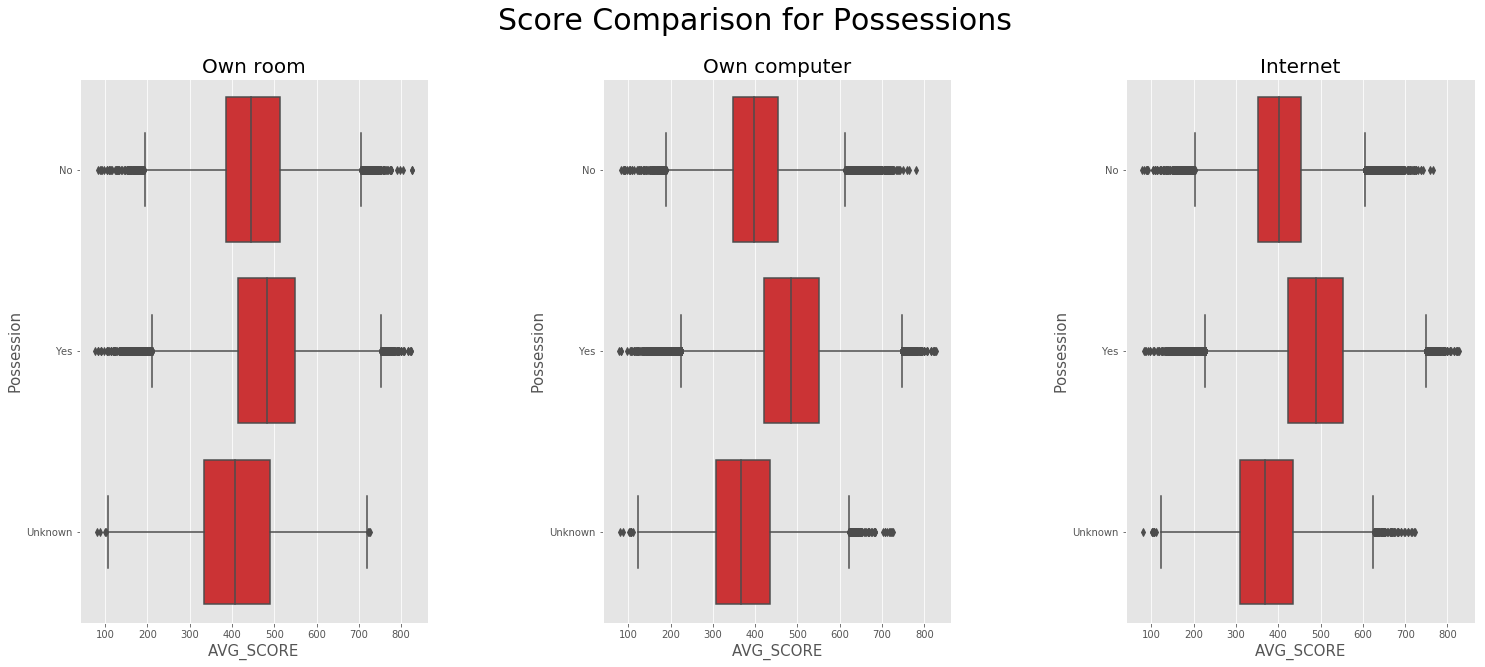

In [5]:
# create figure
plt.figure(figsize = [25, 10])
# whitespace between subplots
plt.subplots_adjust(wspace = 0.50) 

plt.suptitle('Score Comparison for Possessions', fontsize= 30)

# 1. subplot
plt.subplot(1, 3, 1)
plt.title('Own room', fontsize= 20)
# set up boxplot
sb.boxplot(x = pisa_clean['AVG_SCORE'], y = pisa_clean['POS_OWN_ROOM'], 
           color=sb.color_palette('Set1')[0]);
# fine-tuning
plt.yticks(fontsize= 10)
plt.xticks(fontsize= 10)
plt.xlabel('AVG_SCORE', fontsize= 15)
plt.ylabel('Possession',fontsize= 15)

# 2. subplot
plt.subplot(1, 3, 2)
plt.title('Own computer', fontsize= 20)
# set up boxplot
sb.boxplot(x = pisa_clean['AVG_SCORE'], y = pisa_clean['POS_OWN_COMP'], 
           color=sb.color_palette('Set1')[0]);
# fine-tuning
plt.yticks(fontsize= 10)
plt.xticks(fontsize= 10)
plt.xlabel('AVG_SCORE', fontsize= 15)
plt.ylabel('Possession',fontsize= 15)

# 3. subplot
plt.subplot(1, 3, 3)
plt.title('Internet', fontsize= 20)
# set up boxplot
sb.boxplot(x = pisa_clean['AVG_SCORE'], y = pisa_clean['POS_INTERNET'], 
           color=sb.color_palette('Set1')[0]);
# fine-tuning
plt.yticks(fontsize= 10)
plt.xticks(fontsize= 10)
plt.xlabel('AVG_SCORE', fontsize= 15)
plt.ylabel('Possession',fontsize= 15)

# save plot as png
plt.savefig('bivariate_bp_ScoreComparisonPossession.png')
plt.show();

# Skipping school
## Bivariate Exploration
There is an obvious pattern that students that do not skip school are overall in each subject better than students skipping school. The difference from students never skipping school and skipping five or more times in Score is 13.5 % worse. Students that skip school only one or two times are in average 5.8 % worse than students that never skip school.

In [6]:
# Check what selections are possible and the count of each selection
pisa_clean['SKIPPED_SCHOOL'].value_counts();

None                   306065
One or two times       124380
Three or four times     29817
Five or more times      18881
Unknown                  6347
Name: SKIPPED_SCHOOL, dtype: int64

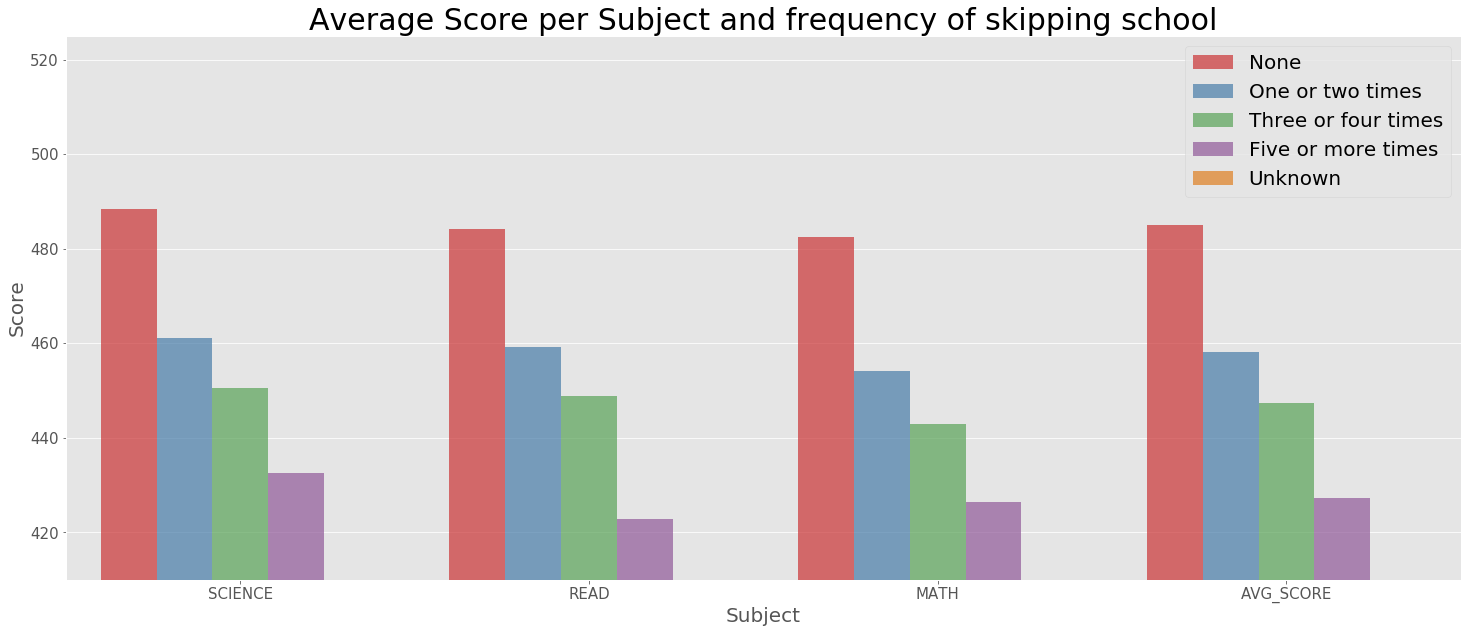

In [7]:
# Aggregate cleaned dataset for desired visualization
pisa_skip_school_agg = pisa_clean.groupby('SKIPPED_SCHOOL')['MATH','READ','SCIENCE','AVG_SCORE'].mean().reset_index()

# Create new dataframe for barplot output
pisa_skipped_vis = pd.DataFrame(columns=['SKIPPED_SCHOOL','SUBJECT','AVG_SCORE'])
# iterate row by row and column by column and insert into new dataframe with modified shape
for index, row in pisa_skip_school_agg.iterrows(): 
    for columnname in ['MATH','READ','SCIENCE','AVG_SCORE']:
        pisa_skipped_vis = pisa_skipped_vis.append({ 'SKIPPED_SCHOOL': row['SKIPPED_SCHOOL'],
                                                     'SUBJECT': columnname,
                                                     'AVG_SCORE': row[columnname]}, ignore_index=True)
# Sort dataframe by score
pisa_skipped_vis = pisa_skipped_vis.sort_values(by = ['SUBJECT','AVG_SCORE'], axis=0, ascending=False)

# create figure
plt.figure(figsize = [25, 10])
# create barplot
sb.barplot(x='SUBJECT', y='AVG_SCORE', hue='SKIPPED_SCHOOL', data= pisa_skipped_vis, 
           palette=sb.color_palette('Set1'), alpha=0.7)
# set title and labels
plt.title('Average Score per Subject and frequency of skipping school', fontsize=30)
plt.legend(loc='upper right', fontsize= 20)
plt.yticks(fontsize= 15)
plt.xticks(fontsize= 15)
plt.xlabel('Subject', fontsize= 20)
plt.ylabel('Score',fontsize= 20)
plt.ylim(410, 525)

# save plot as png
plt.savefig('univariate_bp_ScoreSkippingSchool.png')
plt.show();

# Skipping school
## Multivariate Exploration
This plot shows clearly that the higher the grade is the lesser the possibility of a student skipping school. This is visible as all students have never skipped school are colored red. There is a threshold at around 550 to see where the students drastically disapear that have skipped school. But of course there are some outliers as well to see, that managed to reach a score of more than 600. It appears as in the previous investigations that Uruguay has significantly more students that have skipped school than Japan.

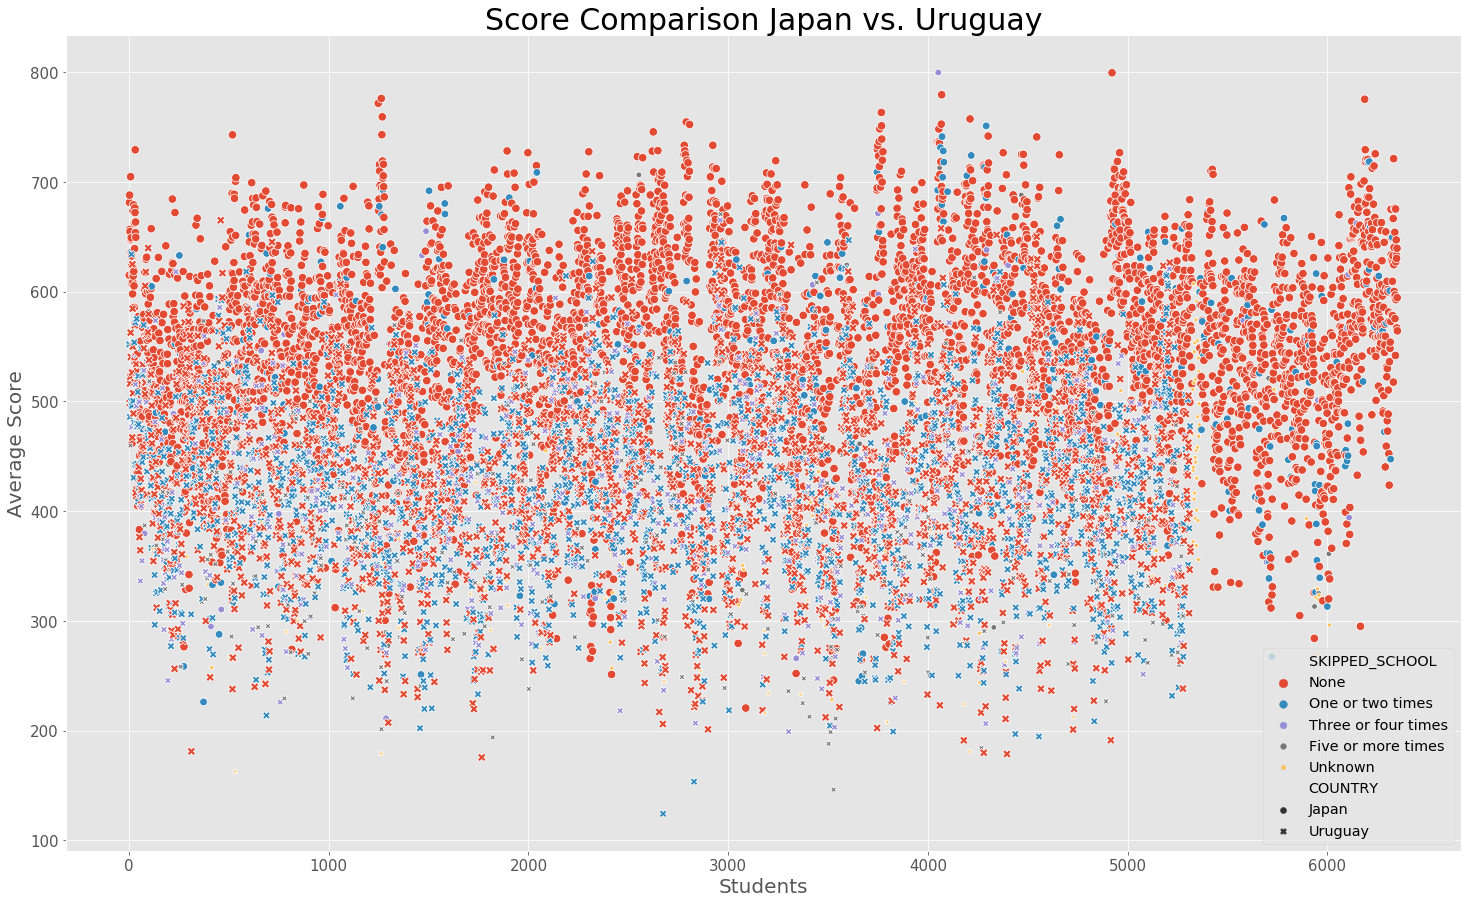

In [8]:
# create figure
plt.figure(figsize = [25, 15])
# make scatterplot
sb.scatterplot(x= 'STUDENT_ID', y= 'AVG_SCORE', hue= 'SKIPPED_SCHOOL', size= 'SKIPPED_SCHOOL', style= 'COUNTRY', data= pisa_clean[pisa_clean['COUNTRY'].isin(['Uruguay','Japan'])]);
# fine-tuning
plt.title('Score Comparison Japan vs. Uruguay', fontsize= 30)
plt.yticks(fontsize= 15)
plt.xticks(fontsize= 15)
plt.xlabel('Students', fontsize= 20)
plt.ylabel('Average Score',fontsize= 20)
plt.legend(fontsize='x-large', title_fontsize='40')

# save plot as png
plt.savefig('multivariate_sp_ScoreStudents.png')
plt.show();

# Subjects overall
## Multivariate Exploration
All 3 subjects have a strong correlation. By looking at the pairplot, the correlation is around at 0.8 between all subjects. So, if a student is good in science so should he/she be good in math or reading and vise versa.

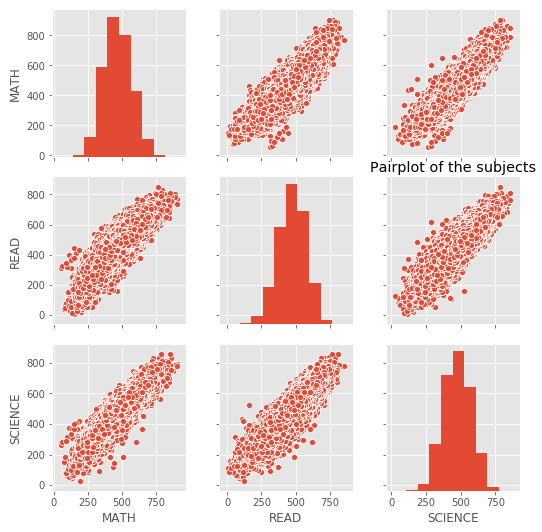

In [9]:
sb.pairplot(pisa_clean[['MATH','READ','SCIENCE']])
plt.yticks(fontsize= 10)
plt.xticks(fontsize= 10)
plt.title('Pairplot of the subjects')

# save plot as png
plt.savefig('multivariate_pp_GradesCorr.png')
plt.show();

# Subjects overall
## Bivariate Exploration
Looking at the ovarall scoring, the pairplot and its correlation from before make sense.

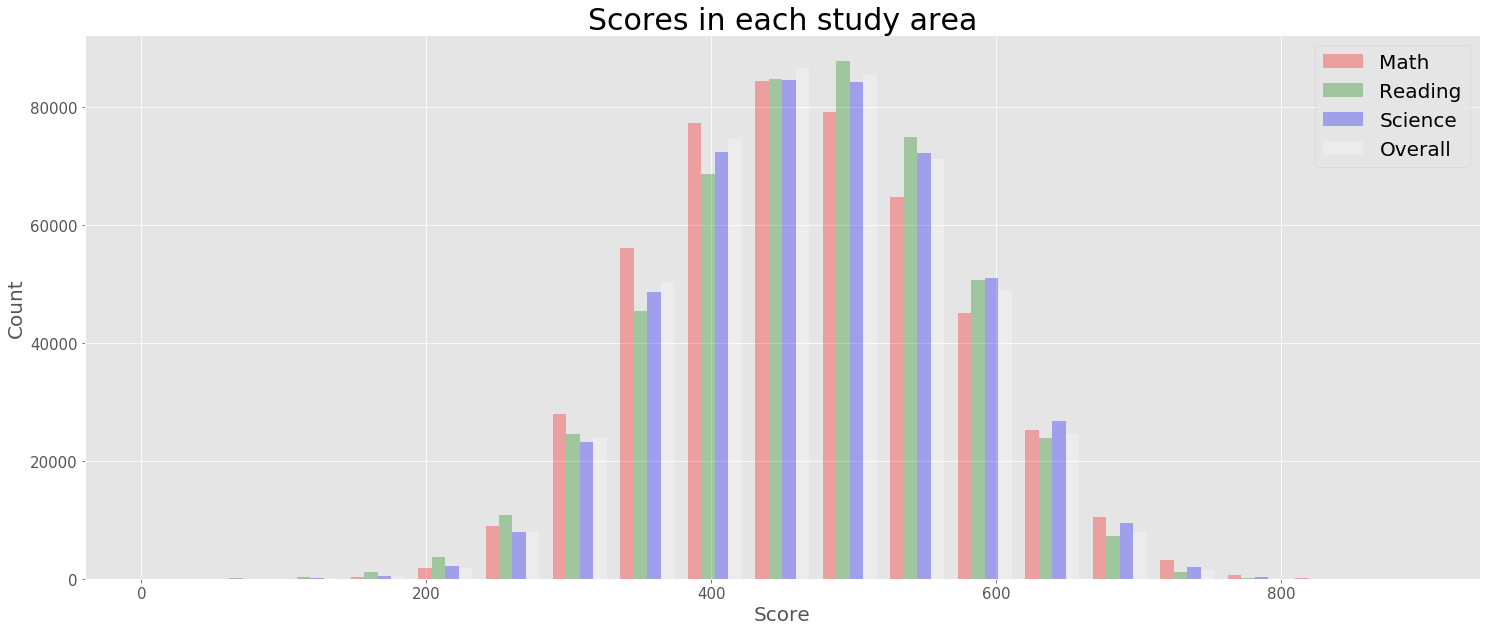

In [10]:
plt.figure(figsize = [25, 10])

bins = np.linspace(0, 900, 20)

plt.hist([pisa_clean['MATH'], pisa_clean['READ'], pisa_clean['SCIENCE'], pisa_clean['AVG_SCORE']], bins, 
         alpha=0.3, label=['Math','Reading','Science', 'Overall'], color=['red','green','blue','white'])
plt.legend(loc='upper right', fontsize= 20)
plt.yticks(fontsize= 15)
plt.xticks(fontsize= 15)
plt.xlabel('Score', fontsize= 20);
plt.ylabel('Count', fontsize= 20)
plt.title('Scores in each study area', fontsize=30);
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!